# Zbiór danych - wyniki wyborów do Parlamentu Europejskiego 2019 w Polsce

2019-european-parliament-election-in-poland-data

Źródło: Kaggle, https://www.kaggle.com/datasets/brezniczky/2019-european-parliament-election-in-poland-data

Zbiór składa się z 13 arkuszy - po jednym dla każdego okręgu wyborczego. W każdym arkuszu znajdują się informacje o liczbie głosów oddanych na poszczególnych kandydatów w poszczególnych obwodach, wraz z charakterystyką obwodu (wieś/miasto, przynależność do powiatu i gminy, dokładna lokalizacja, informacja o frekwencji i głosach nieważnych). W ramach preprocesingu, połączyliśmy wszystkie arkusze w pojedynczą strukturę danych, sumując głosy na kandydatów danego komitetu wyborczego w poszczególnym obwodzie do zbiorczego dla tego obwodu wyniku komitetu.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import statistics
import plotnine as gg
import numpy as np

# Prezentacja danych przed preprocessingiem

In [2]:
#Testowe wczytanie pojedynczego arkusza z danymi (1 z 13)
import pandas as pd
data_district_1=pd.read_csv('2019-european-parliament-election-in-poland-data/wyniki_gl_na_kand_po_obwodach_sheet_1.csv')
data_district_1

,Kod terytorialny gminy,Nr obwodu głosowania,Typ obszaru,Typ obwodu,Siedziba Obwodowej Komisji Wyborczej,Gmina,Powiat,Województwo,Komisja otrzymała kart do głosowania,Liczba wyborców uprawnionych do głosowania,...,2 KNUTH Maciej,3 JANOWICZ Kamila Marta,4 WIŚNIEWSKI Radosław Andrzej,5 PAWEŁCZAK Barnaba Bogusz,6 STRUK Anna Marta,7 WARDA Małgorzata Maja,8 MAKRENEK Helena Cecylia,9 DOMŻALSKA Elżbieta Maria,10 GRAJKOWSKI Piotr,Razem.6
0,220101,1,wieś,stały,Gminna Biblioteka i Ośrodek Kultury w Borzytuc...,gm. Borzytuchom,bytowski,pomorskie,1199,1583,...,0,1,0,0,0,0,0,0,0,4
1,220101,2,wieś,stały,"Sala wiejska, Dąbrówka 22, 77-100 Bytów",gm. Borzytuchom,bytowski,pomorskie,349,463,...,2,0,0,0,0,0,0,0,0,2
2,220101,3,wieś,stały,"Szkoła Podstawowa, Niedarzyno 21b, 77-141 Borz...",gm. Borzytuchom,bytowski,pomorskie,319,424,...,0,0,0,0,0,0,0,0,0,2
3,220102,1,miasto,stały,"Zespół Szkół Ogólnokształcących, ul. Gdańska 5...",gm. Bytów,bytowski,pomorskie,1180,1550,...,0,0,0,0,0,0,0,0,1,1
4,220102,2,miasto,stały,"Zespół Szkół Ponadgimnazjalnych, ul. Gen. Wład...",gm. Bytów,bytowski,pomorskie,1062,1392,...,0,0,0,1,0,0,0,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,226401,17,miasto,stały,Spółdzielnia Mieszkaniowa im. J. I. Kraszewske...,m. Sopot,Sopot,pomorskie,1219,1615,...,1,0,0,3,0,1,0,0,1,10
1392,226401,18,miasto,stały,"Zespół Szkół Handlowych, ul. Wejherowska 1, 81...",m. Sopot,Sopot,pomorskie,719,954,...,1,2,1,0,1,1,0,2,0,9
1393,226401,19,miasto,stały,"Miejska Biblioteka Publiczna Filia Nr 8, ul. M...",m. Sopot,Sopot,pomorskie,1091,1417,...,0,0,0,0,1,0,0,0,0,5
1394,226401,20,miasto,stały,Szkoła Podstawowa z Oddziałami Integracyjnymi ...,m. Sopot,Sopot,pomorskie,1078,1437,...,1,1,1,0,2,0,0,0,0,11


In [3]:
#Opis danych z arkusza testowego
data_district_1.describe(include='all')

,Kod terytorialny gminy,Nr obwodu głosowania,Typ obszaru,Typ obwodu,Siedziba Obwodowej Komisji Wyborczej,Gmina,Powiat,Województwo,Komisja otrzymała kart do głosowania,Liczba wyborców uprawnionych do głosowania,...,2 KNUTH Maciej,3 JANOWICZ Kamila Marta,4 WIŚNIEWSKI Radosław Andrzej,5 PAWEŁCZAK Barnaba Bogusz,6 STRUK Anna Marta,7 WARDA Małgorzata Maja,8 MAKRENEK Helena Cecylia,9 DOMŻALSKA Elżbieta Maria,10 GRAJKOWSKI Piotr,Razem.6
count,1396.000000,1396.000000,1396,1396,1396,1396,1396,1396,1396.000000,1396.000000,...,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000
unique,NaN,NaN,2,8,1267,123,20,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,miasto,stały,Szkoła Podstawowa Nr 2 z Oddziałami Sportowymi...,m. Gdańsk,Gdańsk,pomorskie,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,759,1314,5,198,198,1396,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,222342.944126,25.264327,NaN,NaN,NaN,NaN,NaN,NaN,963.150430,1264.388252,...,0.534384,0.573066,0.310172,0.208453,0.575931,0.409742,0.128940,0.213467,0.506447,6.035100
std,2399.816744,41.512458,NaN,NaN,NaN,NaN,NaN,NaN,475.617459,640.724087,...,0.998691,1.179134,0.664888,0.488095,0.933238,0.792269,0.399633,0.505445,0.823900,5.392367
min,220101.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,18.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,220604.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,593.750000,776.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,221302.000000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,970.000000,1267.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,226101.000000,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,1295.000000,1707.250000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,9.000000


# Preprocessing

In [4]:
#Wczytanie i obróbka całości danych

big_dataset = pd.DataFrame()

#Trzeba wczytać każdy z 13 arkuszy z danymi dla poszczególnych okręgów wyborczych
for i in range(1,14):
    filename = '2019-european-parliament-election-in-poland-data/wyniki_gl_na_kand_po_obwodach_sheet_'+str(i)+'.csv'
    data_district = pd.read_csv(filename)
    data_district['obwod'] = i
    df = data_district.copy()
    cols_to_remove = []
    for c in range(35,len(df.columns)):
        cols_to_remove.append(c)
    #Wycięcie nadmiarowych danych - szczegółowych informacji o głosach na poszczególnych kandydatów w poszczególnych komisjach
    df.drop(df.columns[cols_to_remove],axis=1,inplace=True)
    #Uwzględnienie w danych zbiorczych wyników komitetów wyborczych w poszczególnych komisjach
    df['Konfederacja'] = data_district['Lista nr 1 - KWW KONFEDERACJA KORWIN BRAUN LIROY NARODOWCY']
    df['Wiosna'] = data_district['Lista nr 2 - KW WIOSNA ROBERTA BIEDRONIA']
    df['Koalicja Europejska'] = data_district['Lista nr 3 - KKW KOALICJA EUROPEJSKA PO PSL SLD .N ZIELONI']
    df['Prawo i Sprawiedliwość'] = data_district['Lista nr 4 - KW PRAWO I SPRAWIEDLIWOŚĆ']
    df['Lewica Razem'] = data_district['Lista nr 5 - KKW LEWICA RAZEM - RAZEM, UNIA PRACY, RSS']
    df['Kukiz15'] = data_district['Lista nr 6 - KWW KUKIZ\'15']
    #Poniżej trzy komitety, które były zarejestrowane tylko w niektórych okręgach wyborczych
    if 'Lista nr 7 - KWW POLSKA FAIR PLAY BEZPARTYJNI GWIAZDOWSKI' in data_district.columns:
        df['Polska Fair Play'] = data_district['Lista nr 7 - KWW POLSKA FAIR PLAY BEZPARTYJNI GWIAZDOWSKI']
    else:
        df['Polska Fair Play'] = 0
    if 'Lista nr 9 - KKW POLEXIT - KOALICJA' in data_district.columns:
        df['POLEXIT'] = data_district['Lista nr 9 - KKW POLEXIT - KOALICJA']
    else:
        df['POLEXIT'] = 0
    if 'Lista nr 10 - KW JEDNOŚĆ NARODU' in data_district.columns:
        df['Jedność Narodu'] = data_district['Lista nr 10 - KW JEDNOŚĆ NARODU']
    else:
        df['Jedność Narodu'] = 0
    #Dodanie kolumny przechowującej informację o tym, w którym okręgu znajduje się dana komisja
    df['obwod'] = i
    
    #Doklejenie wczytanych dla okręgu i obrobionych danych do głównego zbioru
    big_dataset = pd.concat([big_dataset,df])
    
#Opis głównego zbioru
big_dataset.describe(include='all')

,Kod terytorialny gminy,Nr obwodu głosowania,Typ obszaru,Typ obwodu,Siedziba Obwodowej Komisji Wyborczej,Gmina,Powiat,Województwo,Komisja otrzymała kart do głosowania,Liczba wyborców uprawnionych do głosowania,...,Konfederacja,Wiosna,Koalicja Europejska,Prawo i Sprawiedliwość,Lewica Razem,Kukiz15,Polska Fair Play,POLEXIT,Jedność Narodu,obwod
count,27285.000000,27285.000000,27285,27285,27285,27285,27285,27285,27285.000000,27285.000000,...,27285.000000,27285.000000,27285.000000,27285.000000,27285.000000,27285.000000,27285.000000,27285.000000,27285.000000,27285.000000
unique,NaN,NaN,5,11,24676,2415,372,16,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,wieś,stały,"Szkoła Podstawowa Nr 89, os. Piastów 34a, 31-6...",m. Kraków,Warszawa,mazowieckie,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,13653,25426,7,450,787,3689,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,166300.613451,38.968921,NaN,NaN,NaN,NaN,NaN,NaN,848.402566,1103.861169,...,22.766648,30.308778,192.411032,226.966465,6.184534,18.455708,2.712589,0.289536,0.081034,7.594502
std,89754.821954,113.809837,NaN,NaN,NaN,NaN,NaN,NaN,445.941482,587.857259,...,19.426998,32.947553,180.300466,132.484900,6.526254,14.381175,5.198346,0.943785,0.451984,3.636784
min,20101.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,101004.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,500.000000,654.000000,...,9.000000,7.000000,52.000000,132.000000,2.000000,8.000000,0.000000,0.000000,0.000000,5.000000
50%,146513.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,811.000000,1068.000000,...,19.000000,20.000000,138.000000,214.000000,4.000000,16.000000,0.000000,0.000000,0.000000,8.000000
75%,241710.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,1170.000000,1527.000000,...,33.000000,43.000000,285.000000,306.000000,9.000000,26.000000,3.000000,0.000000,0.000000,11.000000


# Proste wizualizacje zbioru danych

Text(0.5, 0, 'Liczba głosów [miliony]')

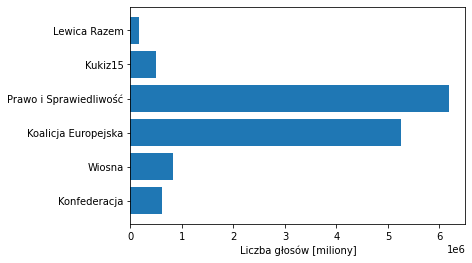

In [5]:
#Prosta wizualizacja ogólnopolskich wyników głównych komitetów
import matplotlib.pyplot as plt

cols = ['Konfederacja', 'Wiosna','Koalicja Europejska', 'Prawo i Sprawiedliwość', 'Kukiz15', 'Lewica Razem']
plt.barh(cols,big_dataset[cols].sum())
plt.xlabel("Liczba głosów [miliony]")

Porównanie z wynikami wyborów z Wikipedii

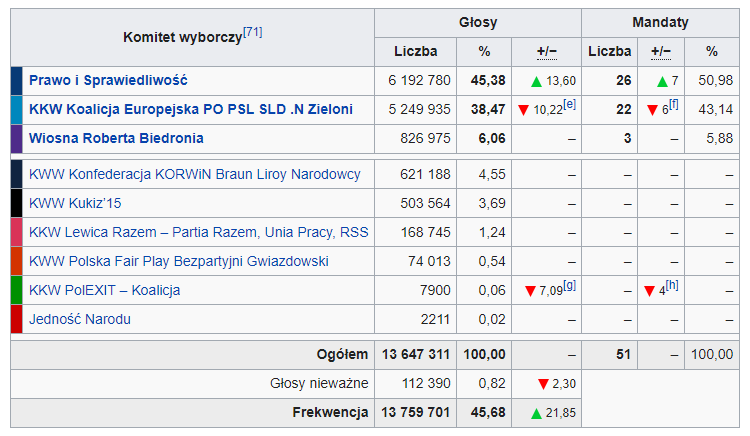

Text(0, 0.5, 'Średnia frekwencja [%]')

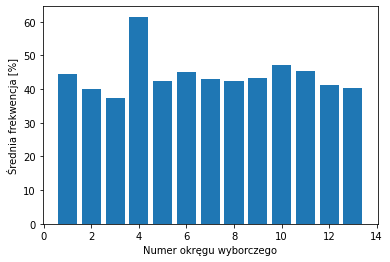

In [6]:
# Prezentacja danych dotyczących frekwencji
big_dataset["frekwencja"] = (big_dataset["Liczba kart wyjętych z urny"]/big_dataset["Liczba wyborców uprawnionych do głosowania"])*100
# print(big_dataset["frekwencja"])
# print(big_dataset.groupby(['obwod'])['frekwencja'].mean('frekwencja'))

frekwencja_po_obwodach = pd.DataFrame(big_dataset.groupby(['obwod'])['frekwencja'].mean('frekwencja'))
# print(frekwencja_po_obwodach['frekwencja'])

plt.bar(big_dataset['obwod'].unique(), frekwencja_po_obwodach['frekwencja'])
plt.xlabel("Numer okręgu wyborczego")
plt.ylabel("Średnia frekwencja [%]")

In [7]:
woj_obwod = big_dataset.groupby(['Województwo','obwod']).size().reset_index().drop(columns=0).sort_values(by=['obwod'])
woj_obwod = woj_obwod.groupby('obwod')['Województwo'].apply(lambda x: " + ".join(x))
woj_obwod_dict = dict(zip(woj_obwod.index, woj_obwod))

In [8]:
woj_obwod_dict

{1: 'pomorskie',
 2: 'kujawsko-pomorskie',
 3: 'warmińsko-mazurskie + podlaskie',
 4: 'mazowieckie',
 5: 'mazowieckie',
 6: 'łódzkie',
 7: 'wielkopolskie',
 8: 'lubelskie',
 9: 'podkarpackie',
 10: 'świętokrzyskie + małopolskie',
 11: 'śląskie',
 12: 'opolskie + dolnośląskie',
 13: 'zachodniopomorskie + lubuskie'}

In [9]:
cols = ['Typ obszaru','Liczba kart wyjętych z urny', 'Liczba wyborców uprawnionych do głosowania', 'frekwencja', 'obwod']
# 

dataset=big_dataset[cols]


count_obwody = pd.DataFrame(dataset.groupby(['obwod', 'Typ obszaru']).sum("Liczba wyborców uprawnionych do głosowania"))
count_obwody= count_obwody.sort_values(by='Typ obszaru', ascending=False).reset_index()
count_obwody = count_obwody.replace({"obwod": woj_obwod_dict})


frek_obwody = pd.DataFrame(dataset.groupby(['obwod', 'Typ obszaru'])['frekwencja'].mean('frekwencja')).reset_index()
frek_obwody = (frek_obwody[frek_obwody['Typ obszaru'].isin(["miasto", "wieś"])])
frek_obwody = frek_obwody.replace({"obwod": woj_obwod_dict})

In [10]:
print(count_obwody.columns, count_obwody)
# print(frek_obwody.columns, frek_obwody)

Index(['obwod', 'Typ obszaru', 'Liczba kart wyjętych z urny',
       'Liczba wyborców uprawnionych do głosowania', 'frekwencja'],
      dtype='object')                               obwod    Typ obszaru   
0                       mazowieckie      zagranica  \
1     zachodniopomorskie + lubuskie           wieś   
2      świętokrzyskie + małopolskie           wieś   
3                           łódzkie           wieś   
4                         lubelskie           wieś   
5                       mazowieckie           wieś   
6                      podkarpackie           wieś   
7                       mazowieckie           wieś   
8                     wielkopolskie           wieś   
9                         pomorskie           wieś   
10  warmińsko-mazurskie + podlaskie           wieś   
11                          śląskie           wieś   
12               kujawsko-pomorskie           wieś   
13          opolskie + dolnośląskie           wieś   
14                      mazowieckie   

In [21]:
p1 = (
    gg.ggplot(count_obwody) 
    + gg.aes(x="obwod", y="Liczba kart wyjętych z urny", fill = 'Typ obszaru')
    +gg.geom_col(position="stack")
    + gg.coord_flip()
)

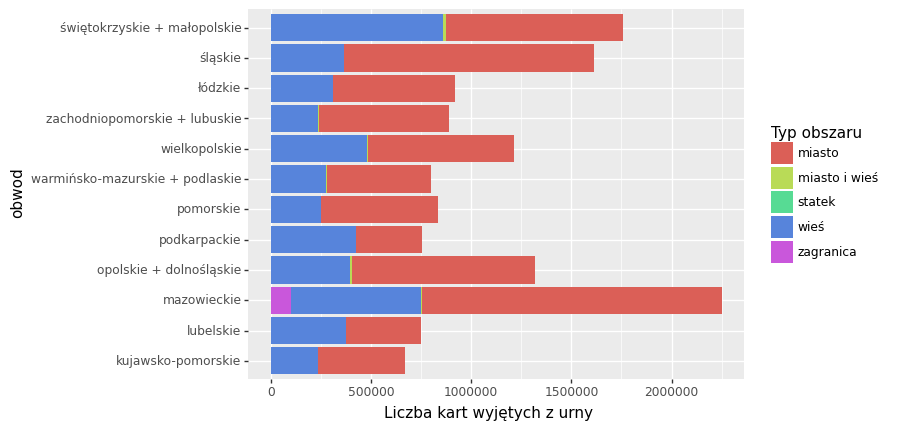

<ggplot: (149462266579)>

In [23]:
p1

In [24]:
p2 = (
    gg.ggplot(frek_obwody, gg.aes(x="obwod", y="frekwencja", fill="Typ obszaru", width=0.8))
    + gg.geom_bar(stat="identity", position="dodge")
    + gg.coord_flip(ylim=(30,60))
    + gg.geom_hline(yintercept=statistics.mean(frek_obwody[frek_obwody["Typ obszaru"]=='wieś']['frekwencja']), color="salmon", size=0.2)
    + gg.geom_hline(yintercept=statistics.mean(frek_obwody[frek_obwody["Typ obszaru"]=='miasto']['frekwencja']), color="lightblue", size=0.6)
    + gg.scale_fill_manual(values=['lightblue', 'salmon'], guide="legend", labels=['miasto', 'wieś'])
)
##średnie są dla komisji! a nie dla wszystkich wartości!

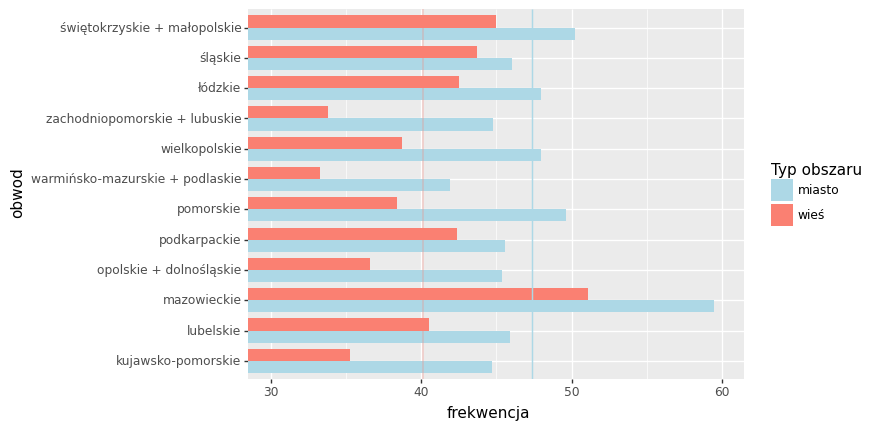

<ggplot: (149461785393)>

In [25]:
p2

In [13]:
miasta = big_dataset.groupby(["Województwo", "Powiat"])[['Powiat','Liczba kart wyjętych z urny']].sum('Liczba kart wyjętych z urny')
max_miasta = miasta.reset_index()
idx =  max_miasta.groupby(["Województwo"])['Liczba kart wyjętych z urny'].transform(max) == max_miasta['Liczba kart wyjętych z urny']
max_miasta = max_miasta[idx].sort_values(by=['Liczba kart wyjętych z urny', 'Powiat'], ascending=False)
print(max_miasta)
order = max_miasta['Liczba kart wyjętych z urny'].tolist()
# print(order)

             Województwo        Powiat  Liczba kart wyjętych z urny
95           mazowieckie      Warszawa                       842309
135          małopolskie        Kraków                       330852
327              łódzkie          Łódź                       282953
3           dolnośląskie       Wrocław                       272486
255        wielkopolskie        Poznań                       230796
211            pomorskie        Gdańsk                       197020
288   zachodniopomorskie      Szczecin                       152780
55             lubelskie        Lublin                       135619
30    kujawsko-pomorskie     Bydgoszcz                       134706
340              śląskie      Katowice                       119431
194            podlaskie     Białystok                       109552
368       świętokrzyskie        Kielce                        81571
171         podkarpackie       Rzeszów                        77423
232  warmińsko-mazurskie       Olsztyn          

In [26]:
p3 = (
    gg.ggplot(max_miasta, gg.aes(x = "Powiat", y = "Liczba kart wyjętych z urny"))
    + gg.geom_col(fill="lightblue", color="darkblue")
    + gg.xlab("Miasto Wojewódzkie")
    + gg.ylab("Liczba głosów")
#     + gg.scale_x_discrete(limits=order)
    + gg.coord_flip()
)

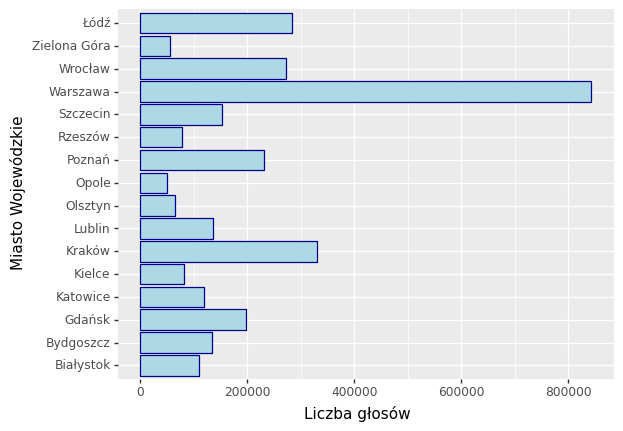

<ggplot: (149462325227)>

In [27]:
p3

In [61]:
p4 = (
    gg.ggplot(big_dataset, gg.aes(x = 'Liczba wyborców uprawnionych do głosowania w obwodzie', y='Liczba głosów oddanych na partię'))
    + gg.geom_smooth(big_dataset, gg.aes(x = 'Liczba wyborców uprawnionych do głosowania', y = 'Prawo i Sprawiedliwość'), size =0.7, color = 'blue')
    + gg.geom_smooth(big_dataset, gg.aes(x = 'Liczba wyborców uprawnionych do głosowania', y = 'Koalicja Europejska'), size =0.7, color = 'orange')
    + gg.scale_color_manual(values=['blue', 'orange'], guide="legend", labels=['Prawo i Sprawiedliwość', 'Koalicja Europejska'])
    + gg.ylab("Liczba głosów oddanych na poszczególne partie")
    + gg.labs(color="Partie")
)

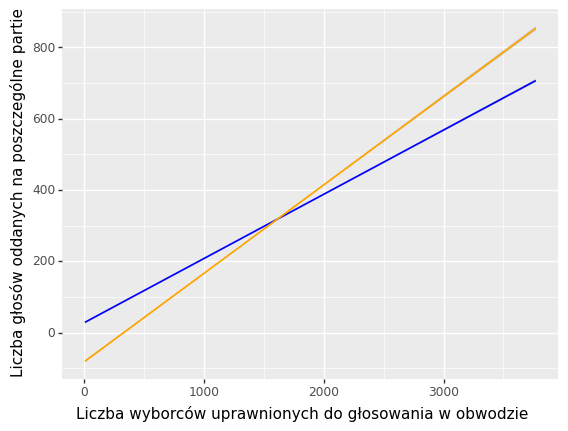

<ggplot: (149467686650)>

In [60]:
p4

In [16]:
results = ['Liczba wyborców uprawnionych do głosowania', 'Prawo i Sprawiedliwość', 'Koalicja Europejska']

size_of_areas = big_dataset[results]

size_of_areas['percentiles'] = pd.qcut(size_of_areas['Liczba wyborców uprawnionych do głosowania'], 50)

count_votes = pd.DataFrame(size_of_areas.groupby(['percentiles']).mean()).reset_index()

#transform to "tall" format
count_votes = count_votes.iloc[:,1:].melt('Liczba wyborców uprawnionych do głosowania')
count_votes


,Liczba wyborców uprawnionych do głosowania,variable,value
0,38.012433,Prawo i Sprawiedliwość,9.211368
1,76.801512,Prawo i Sprawiedliwość,16.241966
2,154.712727,Prawo i Sprawiedliwość,34.178182
3,261.612844,Prawo i Sprawiedliwość,65.012844
4,336.806452,Prawo i Sprawiedliwość,80.605735
...,...,...,...
95,1918.926063,Koalicja Europejska,414.735675
96,1997.308257,Koalicja Europejska,429.820183
97,2092.510989,Koalicja Europejska,452.467033
98,2220.038532,Koalicja Europejska,488.878899


In [17]:
(
    gg.ggplot(count_votes, gg.aes(x = "Liczba wyborców uprawnionych do głosowania w obwodzie", y = "Liczba głosów oddanych na partię w obwodzie"))
    + gg.geom_point(gg.aes(x="Liczba wyborców uprawnionych do głosowania", y="Prawo i Sprawiedliwość"), color='blue', size = 0.2)
    + gg.geom_point(gg.aes(x="Liczba wyborców uprawnionych do głosowania", y="Koalicja Europejska"), color='orange', size = 0.2)
    + gg.geom_smooth(gg.aes(x="Liczba wyborców uprawnionych do głosowania", y="Prawo i Sprawiedliwość"), color="blue")
    + gg.geom_smooth(gg.aes(x="Liczba wyborców uprawnionych do głosowania", y="Koalicja Europejska"), color="orange")
    + gg.labs(color="color")
    + gg.scale_color_manual(values=['blue', 'orange'], guide="legend", labels=['PiS', 'PO'])
)

PlotnineError: "Could not evaluate the 'y' mapping: 'Prawo i Sprawiedliwość' (original error: invalid syntax (<string>, line 1))"

In [66]:
p5 = (
    gg.ggplot(count_votes, gg.aes(x = 'Liczba wyborców uprawnionych do głosowania', y='value', color="variable"))
    + gg.geom_point(size = 0.8)
    + gg.geom_smooth(gg.aes(color= "variable"), size =0.7)
    + gg.scale_color_manual(values=['orange', 'blue'], guide="legend", labels=['Koalicja Europejska', 'Prawo i Sprawiedliwość'])
    + gg.ylab("Liczba głosów oddanych na poszczególne partie")
    + gg.xlab("Liczba wyborców uprawnionych do głosowania w obwodzie")
    + gg.labs(color="Partie")   #+ gg.theme(gg.legend_title = 'Partie')
)

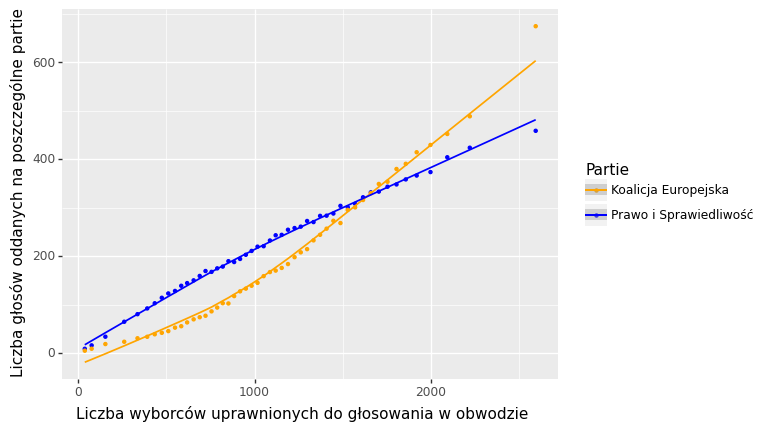

<ggplot: (149470046998)>

In [67]:
p5

In [19]:
help(gg.theme)

Help on class theme in module plotnine.themes.theme:

class theme(builtins.object)
 |  theme(complete=False, axis_title_x=None, axis_title_y=None, axis_title=None, legend_title=None, legend_text_legend=None, legend_text_colorbar=None, legend_text=None, plot_title=None, plot_caption=None, strip_text_x=None, strip_text_y=None, strip_text=None, title=None, axis_text_x=None, axis_text_y=None, axis_text=None, text=None, axis_line_x=None, axis_line_y=None, axis_line=None, axis_ticks_minor_x=None, axis_ticks_minor_y=None, axis_ticks_major_x=None, axis_ticks_major_y=None, axis_ticks_major=None, axis_ticks_minor=None, axis_ticks=None, panel_grid_major_x=None, panel_grid_major_y=None, panel_grid_minor_x=None, panel_grid_minor_y=None, panel_grid_major=None, panel_grid_minor=None, panel_grid=None, line=None, legend_key=None, legend_background=None, legend_box_background=None, panel_background=None, panel_border=None, plot_background=None, strip_background_x=None, strip_background_y=None, strip_bac

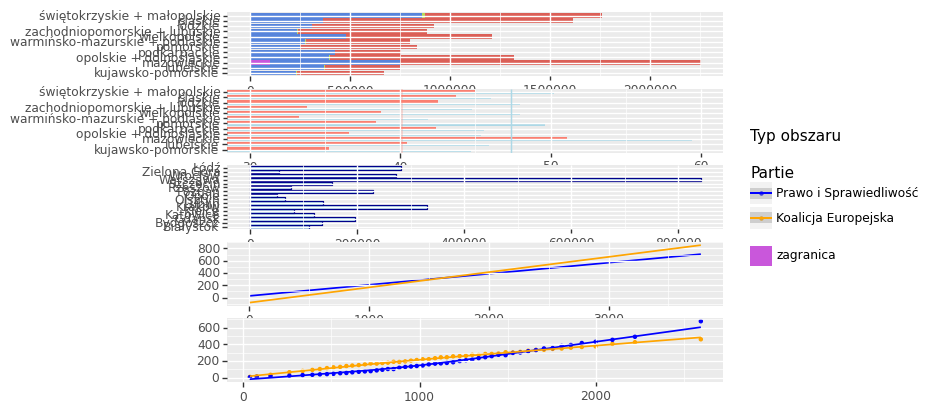

In [62]:
import plotnine as p9
from matplotlib import gridspec
import matplotlib.pyplot as plt
from plotnine import data

# Empty plotnine figure to place the subplots on. Needs junk data (for backend "copy" reasons).
fig = (p9.ggplot()+p9.geom_blank(data=data.diamonds)+p9.theme_void()).draw()

# Create gridspec for adding subpanels to the blank figure
gs = gridspec.GridSpec(5,1)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[2,0])
ax4 = fig.add_subplot(gs[3,0])
ax5 = fig.add_subplot(gs[4,0])

# Add subplots to the figure
_ = p1._draw_using_figure(fig, [ax1])
_ = p2._draw_using_figure(fig, [ax2])
_ = p3._draw_using_figure(fig, [ax3])
_ = p4._draw_using_figure(fig, [ax4])
_ = p5._draw_using_figure(fig, [ax5])

fig.show()

Text(0.5, 0, 'Liczba głosów [miliony]')

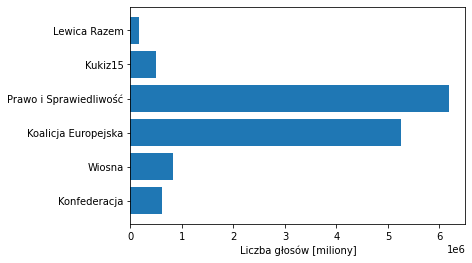

In [41]:
import matplotlib.pyplot as plt

cols = ['Konfederacja', 'Wiosna','Koalicja Europejska', 'Prawo i Sprawiedliwość', 'Kukiz15', 'Lewica Razem']
plt.barh(cols,big_dataset[cols].sum())
plt.xlabel("Liczba głosów [miliony]")

Text(0, 0.5, 'Średnia frekwencja [%]')

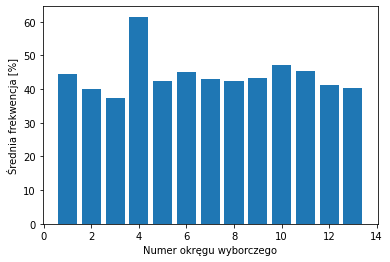

In [42]:
plt.bar(big_dataset['obwod'].unique(), frekwencja_po_obwodach['frekwencja'])
plt.xlabel("Numer okręgu wyborczego")
plt.ylabel("Średnia frekwencja [%]")

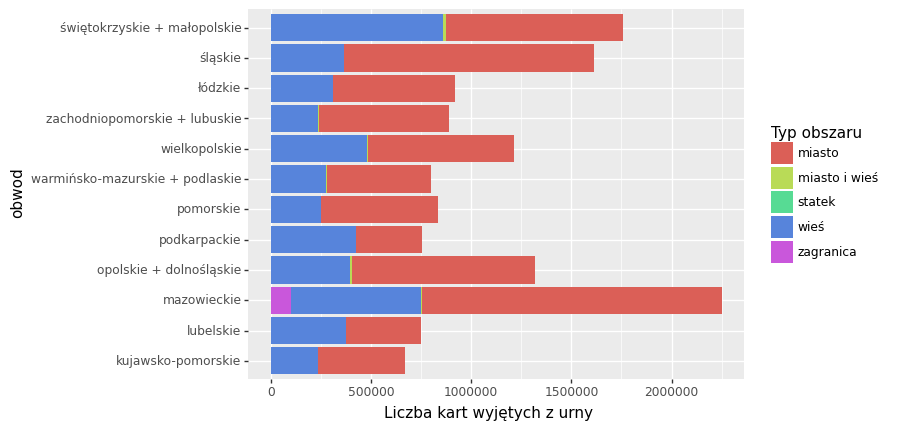

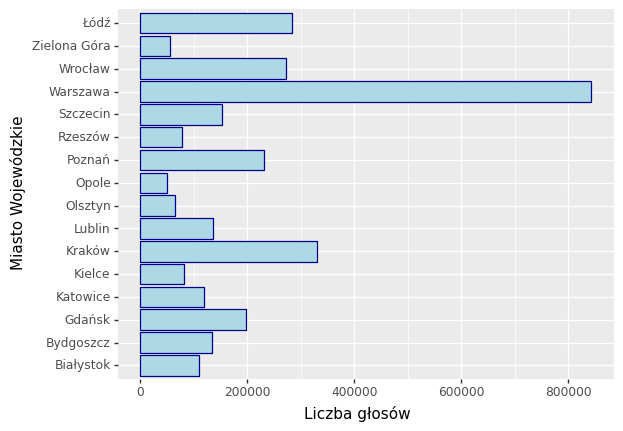

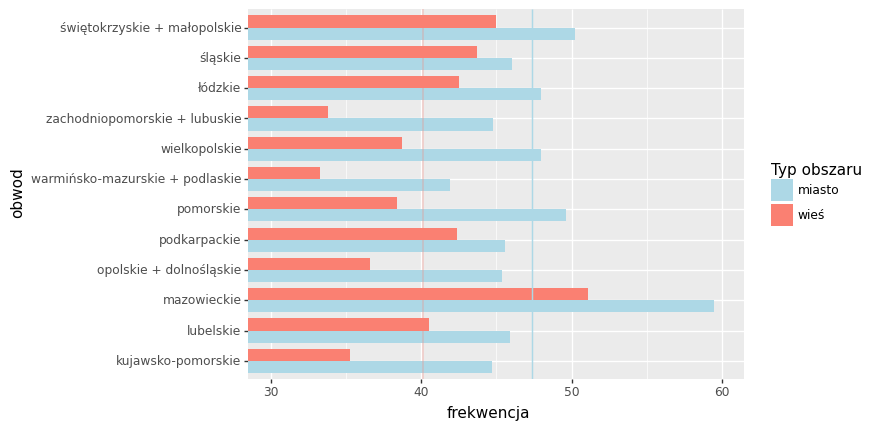

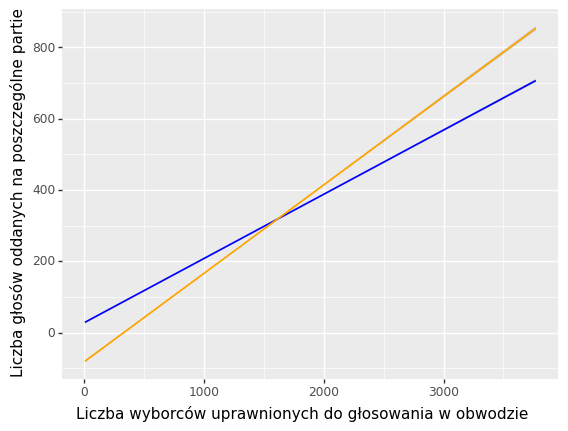

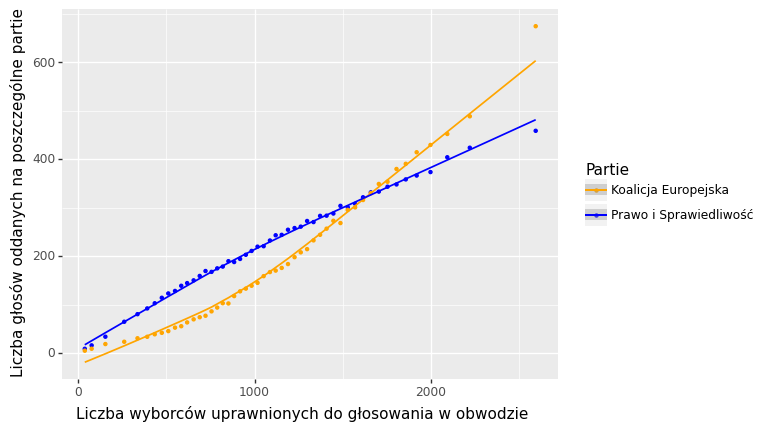

In [68]:
plots = [p1, p3, p2, p4, p5]
for p in plots:
    print(p)